# CNN Edges

在Convolution Neural Network(Theory01)中我们已经知道了CNN网络的基础知识,现在我们就用代码一步步实现,我们先尝试边缘检测(卷积操作),再使用Numpy实现完整的FP和BP,最后我们用框架来实现CNN.

### Edges

我们先来尝试边缘检测,这里我们使用原图:

<img src="01.png">

做卷积操作有两种方法:

1:使用最简单的for loop依次做卷积

2:使用im2col

**Ps:**

- 为了代码简洁,我们这里使用灰度图,另外将图片的大小(378,366)转成(366,366)方便计算.

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

### 1.For Loop

我们以灰度图的方式打开原图

In [2]:
img = Image.open('01.png').convert('L')

更改原图大小,使之变成$(366\times 366)$

The Gray Img shape is:(366, 366)


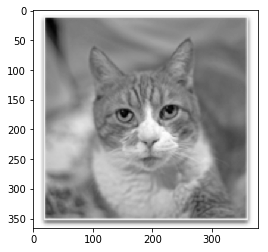

In [3]:
data = np.asarray(img.resize((366,366)))
print('The Gray Img shape is:{}'.format(data.shape))
plt.imshow(img,cmap='gray')
plt.show()

接着我们使用垂直卷积核:

Conv Kernel=$\begin{bmatrix}
1 & 0 &-1 \\ 
1 & 0 &-1 \\ 
1 & 0 &-1 
\end{bmatrix}$

$F=3,S=1,P=0$

所以我们知道最终卷积的结果将是$\frac{366+2*0-3}{1}+1=364$

In [4]:
conv_kernel = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
print('The Kernel is:\n',conv_kernel)

The Kernel is:
 [[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


由于我们的步长为1,所以对于(366,366)的输入,实际上每次操作的索引是:


[0:3,0:3]

[0:3,1:4]

[0:3,2:5]

...

[0:3,364:367]

[1:4,0:3]

[1:4,1:4]

....

[364:367,364:367]

所以我们的for loop形式为:

In [5]:
CONV_data = np.zeros((364,364))
for i in range(364):
    for j in range(364):
        son_data = data[i*1:(i*1+3),j*1:(j*1+3)]
        CONV_data[i,j] = np.sum(son_data*conv_kernel)

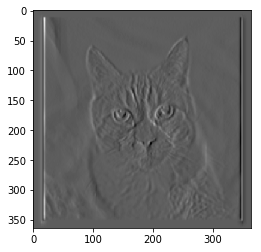

In [6]:
plt.imshow(CONV_data,cmap='gray')

可以很明显的看出垂直边缘已经被检测出来了,最明显的就是左侧和右侧.

现在我们封装函数来对比下:

[1] 水平卷积核(Horizontal),也就是垂直卷积核旋转90°.

$Horizontal=\begin{bmatrix}
1 &1  &1 \\ 
 0&0  &0 \\ 
 -1& -1 &-1 
\end{bmatrix}$

[2] sobel filter

$sobel\;filter=\begin{bmatrix}
1 &0  &-1 \\ 
 2&0  &-2 \\ 
 1& 0 &-1 
\end{bmatrix}$

[3] Scharr filter

$Scharr\;filter=\begin{bmatrix}
3 &0  &-3 \\ 
10&0  &-10 \\ 
 3& 0 &-3 
\end{bmatrix}$

对于卷积结果公式为:

$Input: n_{h}^{[l-1]}\times n_{w}^{[l-1]}\times n_{c}^{[l-1]}$

$OutPut\; Size: \left \lfloor \frac{n_{h}^{[l-1]}+2p^{[l]}-f^{[l]}}{s^{[l]}} +1 \right \rfloor \times \left \lfloor \frac{n_{w}^{[l-1]}+2p^{[l]}-f^{[l]}}{s^{[l]}} +1 \right \rfloor \times n_{c}^{[l]}$

In [7]:
def CONV(data,conv_kernel,conv_dict):
    """
    Implementation CONVOLUTION.
    
    Arguments:
    ---------
        data: input data.
        conv_kernel: convolution kernel or filter.
        conv_dict: have #filter,stride,#padding.
    Return:
    -------
        CONV_data:convoluted data.
    Note:
    ----
        In this function,do not using padding!
    """
    h,w = data.shape
    p = conv_dict['p']
    f = conv_dict['f']
    s = conv_dict['s']
    
    conv_H = np.int(np.floor((h+2*p-f)/s +1))
    conv_W = np.int(np.floor((w+2*p-f)/s +1))
    
    CONV_data = np.zeros((conv_H,conv_W))
    for i in range(conv_H):
        for j in range(conv_W):
            son_data = data[i*s:(i*s+f),j*s:(j*s+f)]
            
            CONV_data[i,j] = np.sum(son_data*conv_kernel)
            
            
    return CONV_data

In [8]:
conv_horizontal = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
conv_dict_horizontal = {'p':0,'f':3,'s':1}
conv_horizontal_data = CONV(data,conv_horizontal,conv_dict_horizontal)

conv_soble = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
conv_dict_soble = {'p':0,'f':3,'s':1}
conv_soble_data = CONV(data,conv_soble,conv_dict_soble)

conv_scharr = np.array([[3,0,-3],[10,0,-10],[3,0,-3]])
conv_dict_scharr = {'p':0,'f':3,'s':1}
conv_scharr_data = CONV(data,conv_scharr,conv_dict_scharr)

#### PLot Image

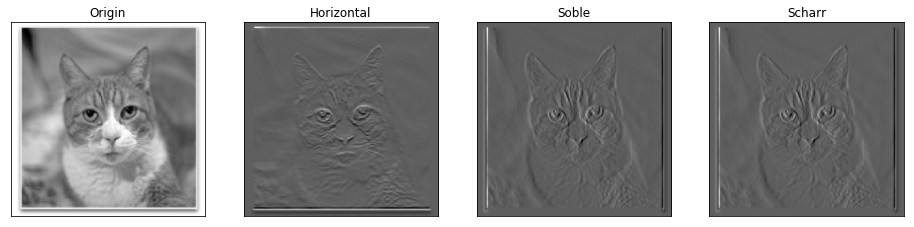

In [9]:
figure = plt.figure(figsize=(16,4))

ax0 = figure.add_subplot(1,4,1)
ax0.imshow(data,cmap='gray')
ax0.set_title('Origin')
ax0.set_xticks(())
ax0.set_yticks(())

ax1 = figure.add_subplot(1,4,2)
ax1.imshow(conv_horizontal_data,cmap='gray')
ax1.set_title('Horizontal')
ax1.set_xticks(())
ax1.set_yticks(())

ax2 = figure.add_subplot(1,4,3)
ax2.imshow(conv_soble_data,cmap='gray')
ax2.set_title('Soble')
ax2.set_xticks(())
ax2.set_yticks(())

ax3 = figure.add_subplot(1,4,4)
ax3.imshow(conv_scharr_data,cmap='gray')
ax3.set_title('Scharr')
ax3.set_xticks(())
ax3.set_yticks(())


plt.show()

下面我们来改变一下步长尝试一下:

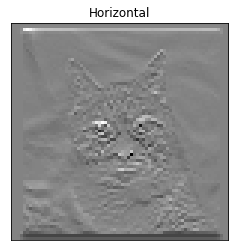

In [10]:
conv_horizontal = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
conv_dict_horizontal = {'p':0,'f':3,'s':5}
conv_horizontal_data = CONV(data,conv_horizontal,conv_dict_horizontal)

plt.imshow(conv_horizontal_data,cmap='gray')
plt.title('Horizontal')
plt.xticks(())
plt.yticks(())
plt.show()

可以看到步长不能取的过长,图片特征信息将会丢失.

接下来我们来尝试一下Pooling.

#### Pooling Layer

Pool 层一般分为Max和Average,常取$F=2,s=2$也就是图片深度不变,大小变为原来的一半.在Pool层一般不使用padding.

In [11]:
def Pool(data,pool_dict,method="MAX"):
    """
    Implemention Pooling layer.
    
    Arguments:
    ---------
        data: Input data.
        pool_dict:have #filter,stride,#padding.
        method: pooling method,default "MAX",can choose "AVERAGE".
    Return:
    ------
        Pool_data:pooled data.
    """
    h,w = data.shape
    p = pool_dict['p']
    f = pool_dict['f']
    s = pool_dict['s']
    
    Pool_H = np.int(np.floor((h+2*p-f)/s +1))
    Pool_W = np.int(np.floor((w+2*p-f)/s +1))
    
    Pool_data = np.zeros((Pool_H,Pool_W))
    for i in range(Pool_H):
        for j in range(Pool_W):
            son_data = data[i*s:(i*s+f),j*s:(j*s+f)]
            if method == "MAX":
                Pool_data[i,j] = np.max(son_data)
            elif method == "AVERAGE":
                Pool_data[i,j] = np.mean(son_data)
            else:
                raise ValueError('%s method Error!'%method)
            
    return Pool_data

In [12]:
pool_soble_dict = {'p':0,'f':2,'s':2}
pool_soble_data_MAX = Pool(conv_soble_data,pool_soble_dict)
print('MAX pool soble data shape:\n',pool_soble_data_MAX.shape)

pool_soble_data_AVERAGE = Pool(conv_soble_data,pool_soble_dict,method='AVERAGE')
print('AVERAGE pool soble data shape:\n',pool_soble_data_AVERAGE.shape)

MAX pool soble data shape:
 (182, 182)
AVERAGE pool soble data shape:
 (182, 182)


可以看到经过pool后大小变为原来的一半(原来为$(364\times 364)$

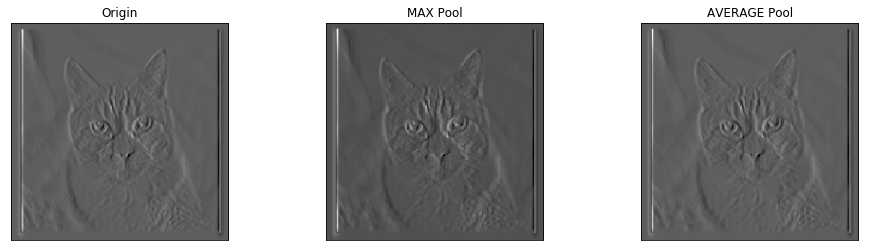

In [13]:
figure = plt.figure(figsize=(16,4))

ax0 = figure.add_subplot(1,3,1)
ax0.imshow(conv_soble_data,cmap='gray')
ax0.set_title('Origin')
ax0.set_xticks(())
ax0.set_yticks(())

ax1 = figure.add_subplot(1,3,2)
ax1.imshow(pool_soble_data_MAX,cmap='gray')
ax1.set_title('MAX Pool')
ax1.set_xticks(())
ax1.set_yticks(())

ax2 = figure.add_subplot(1,3,3)
ax2.imshow(pool_soble_data_AVERAGE,cmap='gray')
ax2.set_title('AVERAGE Pool')
ax2.set_xticks(())
ax2.set_yticks(())

plt.show()

当然效果不是很明显,但是仔细观察也是也可看出来,比如在眼睛的周围,特征会更加突出.

### Im2col

现在我们来尝试一下推荐的卷积方法**Im2col**

Im2col的思想是将卷积核滑过的区域依次展平(X_col)保存.同样将卷积核(W_row)也展平,继而再将两者做np.dot(W_row, X_col),得到的结果和卷积核在每一个位置的输出是等价的.

<img src="../../picture/162.png" width=700 height=700>

In [14]:
def CONV_im2col(data,conv_kernel,conv_dict):
    """
    Implemention im2col of Convolution.
    
    Arguments:
    ---------
        data: input data.
        conv_kernel: convolution kernel or filter.
        conv_dict: have #filter,stride,#padding.
    Return:
    -------
        CONV_im2col_data:convoluted data.
    Note:
    ----
        In this function,do not using padding!
        I change conv_kernel shape is (#kernel,1)
        cache data CONV_im2col_data shape is (#kernel,conv_H*conv_W)
    """

    h,w = data.shape
    p = conv_dict['p']
    f = conv_dict['f']
    s = conv_dict['s']
    
    conv_H = np.int(np.floor((h+2*p-f)/s +1))
    conv_W = np.int(np.floor((w+2*p-f)/s +1))
    
    ############### cache im2col result #################
    im2col_data = np.zeros((f*f,conv_H*conv_W))
    ################### end #############################
    
    count = 0 
    for i in range(conv_H):
        for j in range(conv_W):
            son_data = data[i*s:(i*s+f),j*s:(j*s+f)] # get receptive field.
            im2col_data[:,count] += son_data.flatten() # flatten matrix.
            count +=1
    
    ###########################  dot kernel and im2col matrix ################
    conv_kernel_ = conv_kernel.reshape(1,-1)
    CONV_im2col_data = np.dot(conv_kernel_,im2col_data).reshape(conv_H,conv_W)
    ###############################  end #####################################
    return CONV_im2col_data

In [15]:
conv_horizontal = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
conv_dict_horizontal = {'p':0,'f':3,'s':1}
conv_horizontal_data = CONV_im2col(data,conv_horizontal,conv_dict_horizontal)
print('The horizontal shape is:\n{}'.format(conv_horizontal_data.shape))

conv_soble = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
conv_dict_soble = {'p':0,'f':3,'s':1}
conv_soble_data = CONV_im2col(data,conv_soble,conv_dict_soble)

conv_scharr = np.array([[3,0,-3],[10,0,-10],[3,0,-3]])
conv_dict_scharr = {'p':0,'f':3,'s':1}
conv_scharr_data = CONV_im2col(data,conv_scharr,conv_dict_scharr)

The horizontal shape is:
(364, 364)


#### Plot Image

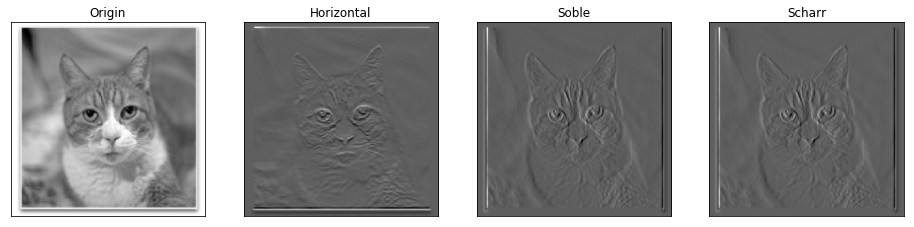

In [16]:
figure = plt.figure(figsize=(16,4))

ax0 = figure.add_subplot(1,4,1)
ax0.imshow(data,cmap='gray')
ax0.set_title('Origin')
ax0.set_xticks(())
ax0.set_yticks(())

ax1 = figure.add_subplot(1,4,2)
ax1.imshow(conv_horizontal_data,cmap='gray')
ax1.set_title('Horizontal')
ax1.set_xticks(())
ax1.set_yticks(())

ax2 = figure.add_subplot(1,4,3)
ax2.imshow(conv_soble_data,cmap='gray')
ax2.set_title('Soble')
ax2.set_xticks(())
ax2.set_yticks(())

ax3 = figure.add_subplot(1,4,4)
ax3.imshow(conv_scharr_data,cmap='gray')
ax3.set_title('Scharr')
ax3.set_xticks(())
ax3.set_yticks(())


plt.show()

可以看到效果与For loop是一样的,但是我们运行的过程中发现速度完全不是同一个级别的,使用Im2col的速度完胜For Loop.

同样Polling层我们也可以使用im2col,不一样的是点积我们换成MAX或者AVERAGE.

#### Pooling Layer

In [49]:
def Pool_im2col(data,pool_dict,method="MAX"):
    """
    Implemention Pooling layer.
    
    Arguments:
    ---------
        data: Input data.
        pool_dict:have #filter,stride,#padding.
        method: pooling method,default "MAX",can choose "AVERAGE".
        
    Return:
    ------
        CONV_im2col_data:pooled data.
    """
    
    h,w = data.shape
    p = pool_dict['p']
    f = pool_dict['f']
    s = pool_dict['s']
    
    conv_H = np.int(np.floor((h+2*p-f)/s +1))
    conv_W = np.int(np.floor((w+2*p-f)/s +1))
    
    ############### cache im2col result #################
    im2col_pool = np.zeros((f*f,conv_H*conv_W))
    ################### end #############################
    
    count = 0 
    for i in range(conv_H):
        for j in range(conv_W):
            son_data = data[i*s:(i*s+f),j*s:(j*s+f)] # get receptive field.
            im2col_pool[:,count] = son_data.flatten() # flatten matrix.
            count +=1
    
    ###########################  choose method inim2col matrix ################
    if method == "MAX":
        POOL_im2col_data = np.max(im2col_pool,axis=0,keepdims=True).reshape(conv_H,conv_W)
    elif method == "AVERAGE":
        POOL_im2col_data = np.mean(im2col_pool,axis=0,keepdims=True).reshape(conv_H,conv_W)
    else:
        raise ValueError('%s method Error!'%method)
    ###############################  end #####################################
    return POOL_im2col_data

In [50]:
pool_soble_dict = {'p':0,'f':2,'s':2}
pool_soble_data_MAX = Pool_im2col(conv_soble_data,pool_soble_dict,method='MAX')
print('MAX pool soble data shape:\n',pool_soble_data_MAX.shape)

pool_soble_data_AVERAGE = Pool_im2col(conv_soble_data,pool_soble_dict,method='AVERAGE')
print('AVERAGE pool soble data shape:\n',pool_soble_data_AVERAGE.shape)

MAX pool soble data shape:
 (182, 182)
AVERAGE pool soble data shape:
 (182, 182)


可以看到经过pool后大小变为原来的一半(原来为$(364\times 364)$

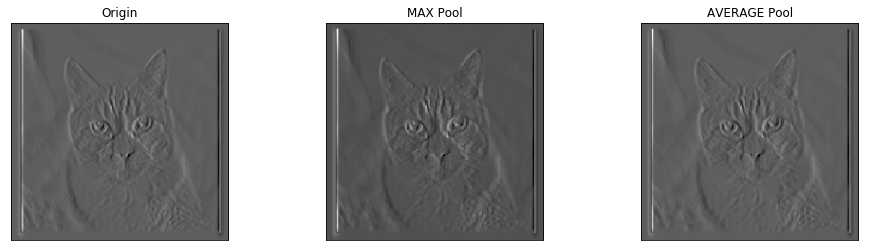

In [36]:
figure = plt.figure(figsize=(16,4))

ax0 = figure.add_subplot(1,3,1)
ax0.imshow(conv_soble_data,cmap='gray')
ax0.set_title('Origin')
ax0.set_xticks(())
ax0.set_yticks(())

ax1 = figure.add_subplot(1,3,2)
ax1.imshow(pool_soble_data_MAX,cmap='gray')
ax1.set_title('MAX Pool')
ax1.set_xticks(())
ax1.set_yticks(())

ax2 = figure.add_subplot(1,3,3)
ax2.imshow(pool_soble_data_AVERAGE,cmap='gray')
ax2.set_title('AVERAGE Pool')
ax2.set_xticks(())
ax2.set_yticks(())

plt.show()

Congratulations!~